In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
print(y)

[1 0 1 ... 0 1 0]


Text(0.5, 1.0, 'Missing Values Heatmap')

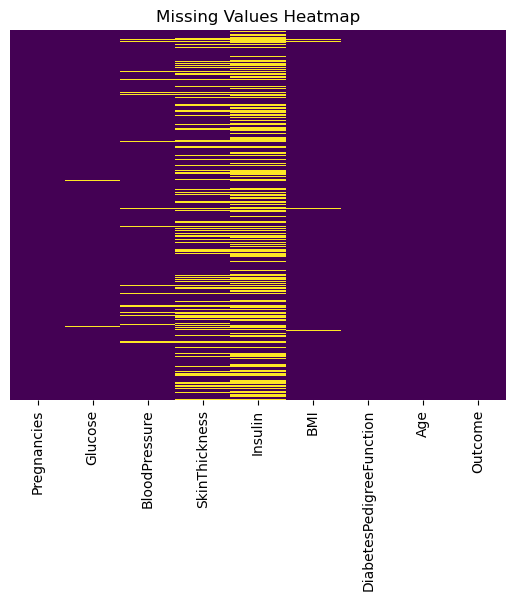

In [5]:
import seaborn as sns
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing Values Heatmap")

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Text(0.5, 1.0, 'Missing Values Heatmap')

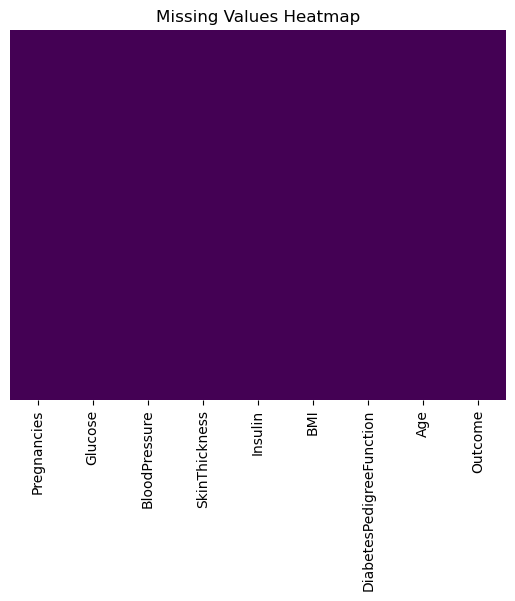

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing Values Heatmap")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


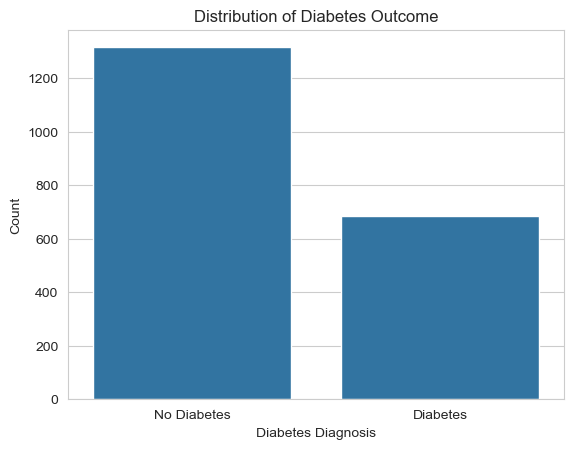

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"])
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

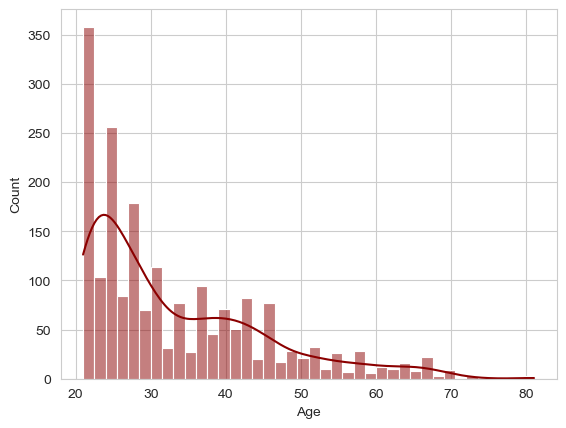

In [10]:
sns.histplot(df['Age'].dropna(),kde=True,color='darkred',bins=40)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data= scaler.fit_transform(X)
X=std_data
print(std_data)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=40)


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred)


[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1]


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = classifier.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on training data:", accuracy_on_training_data)
print("Accuracy on test data:", accuracy_on_test_data)

Accuracy on training data: 0.774375
Accuracy on test data: 0.7875


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Precision: 0.7708
Recall: 0.5401
F1-Score: 0.6352


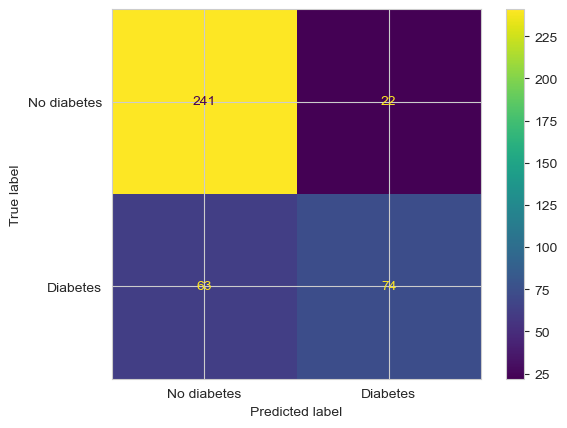

In [17]:

cm = confusion_matrix(y_test, prediction_on_test_data, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No diabetes', 'Diabetes'])
disp.plot()
plt.show()

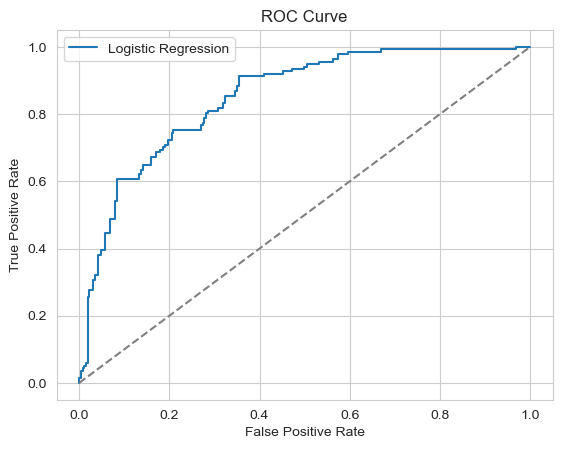

In [18]:
from sklearn.metrics import roc_curve
y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=49)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=49)

In [20]:
rf_preds = rf_model.predict(X_test)
print(rf_preds)

[0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1]


In [48]:
# random forest model
accuracy = accuracy_score(y_test, rf_preds)
precision = precision_score(y_test, rf_preds)
recall = recall_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds)


print(f"Accuracy:{precision:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy:0.9710
Precision: 0.9710
Recall: 0.9781
F1-Score: 0.9745


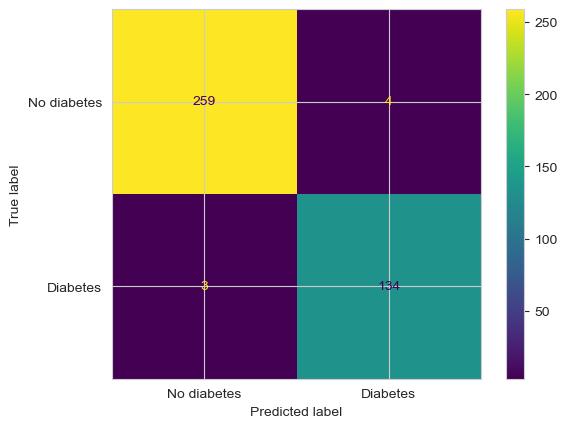

In [50]:
conf_matrix = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No diabetes', 'Diabetes'])
disp.plot()
plt.show()

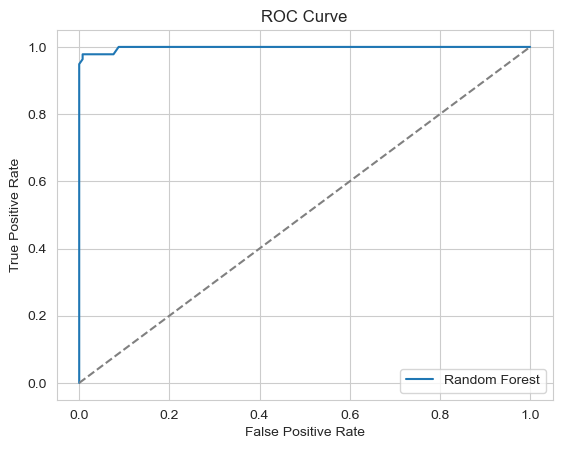

In [23]:
# for random forest model
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr1, tpr1, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()